## Generating queries from keywords

In [1]:
# with open("keywords.txt", "r") as f:
#     text = f.read()
    

# or_func = lambda x: '('+' OR '.join([f'"{kw.title()}"' if len(kw.strip().split()) > 1 else kw for kw in x.strip().split('\n')])+')' if len(x.strip().split('\n')) > 1 else ' OR '.join([f'"{kw}"' for kw in x.strip().split('\n')])
# queries = [or_func(t) for t in text.split('__________________')]

# big_query = [' AND '.join([q]+queries[:2]) for q in queries[2:]]
# for q in big_query:
#     print(q, '\n',len(q))
    
# dictFeatures = {"DataBase":[],"Title":[],"Authors":[],"Year":[],"Type":[],"MSA":[],"MoroccanDialect":[],"GulfDialect":[]
#                ,"LevantineDialect":[],"EgyptianDialect":[],"TunisianDialect":[],"AlgerianDialec":[],"SudaneseDialect":[]
#                 ,"LibyanDialect":[],}
# df = pd.DataFrame()

## Creating dataframe containing papers features

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from mlxtend.preprocessing import TransactionEncoder

C:\Users\uchiha\Anaconda3\envs\nlp\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\uchiha\Anaconda3\envs\nlp\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\uchiha\Anaconda3\envs\nlp\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\uchiha\Anaconda3\envs\nlp\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [315]:
df = pd.read_excel("stateOfTheArtSlr.xlsx")
df.fillna("None",inplace=True)


## Studies dealing with negation 

<AxesSubplot:xlabel='Negation', ylabel='count'>

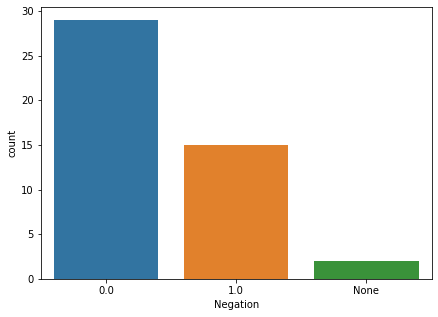

In [4]:
plt.figure(figsize=(7,5)) 
sns.countplot(x="Negation",data=df)

In [5]:
df.shape

(46, 25)

In [6]:
df.columns

Index(['DataBase', 'Title', 'Author', 'Year', 'Type', 'Dataset', 'Annotation',
       'MultiDomain', 'Balanced', 'Source', 'MSA', 'Dialects', 'Labels',
       'Cleaning', 'Normalization', 'Transliteration', 'Translation',
       'StopWords', 'Stemming', 'Negation', 'Approach', 'FeatureExtractor',
       'MachineLearning', 'DeepLearning', 'Results'],
      dtype='object')

## DataBase study

<AxesSubplot:xlabel='DataBase', ylabel='count'>

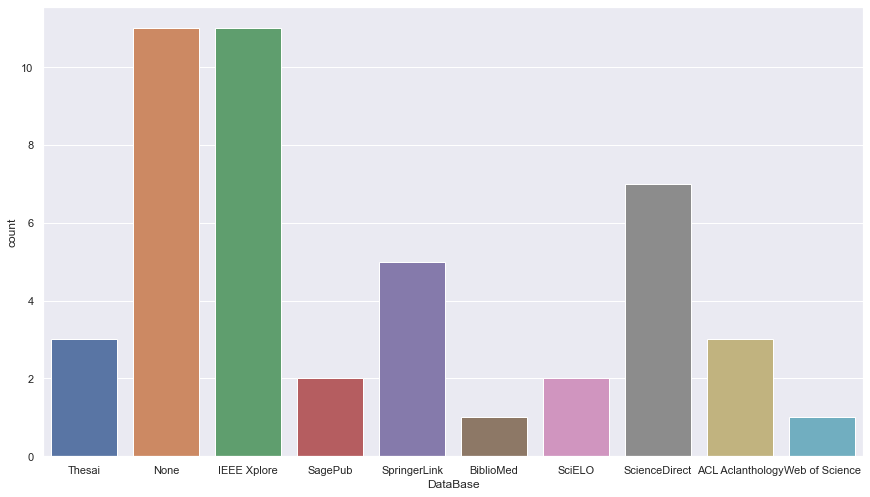

In [7]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.countplot(x= "DataBase",data=df)

## Approach study

<AxesSubplot:ylabel='ApproachPreprocessed'>

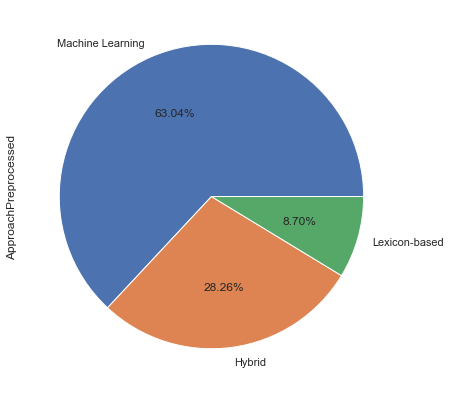

In [291]:
df["ApproachPreprocessed"] = df["Approach"].apply(lambda x : "Machine Learning" if "ML" in x else ("Lexicon-based" if "LB" in x else "Hybrid"))
df["ApproachPreprocessed"].value_counts().plot.pie(y="Approach", autopct="%1.2f%%", figsize=(7, 7))

<AxesSubplot:xlabel='ApproachPreprocessed', ylabel='count'>

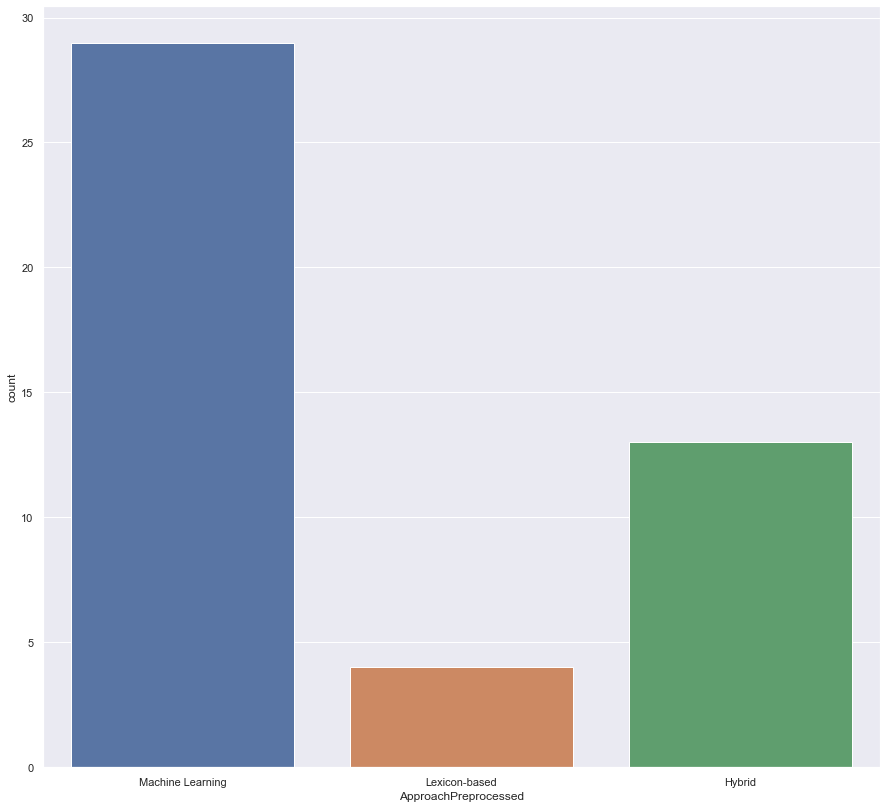

In [292]:
sns.countplot(x= "ApproachPreprocessed",data=df)

## Type of paper (Journal or Conference)

<AxesSubplot:xlabel='TypePreprocessed', ylabel='count'>

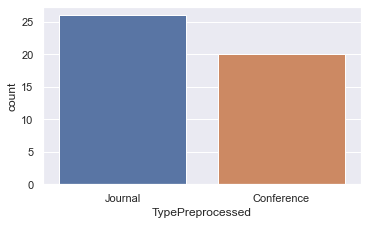

In [293]:
df["TypePreprocessed"] = df["Type"].apply(lambda x : "Journal" if "Journal" in x else "Conference")
sns.set(rc={'figure.figsize':(5.7,3.27)})
sns.countplot(x= "TypePreprocessed",data=df)

## Year

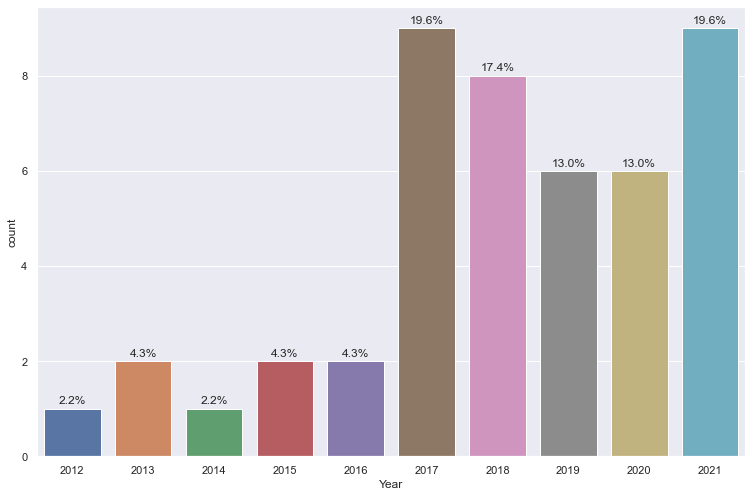

In [294]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
ax = sns.countplot(x= "Year",data=df)
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x-0.4, y+0.1),ha='center')
plt.show()

## Year with Type of paper

<AxesSubplot:xlabel='Year', ylabel='count'>

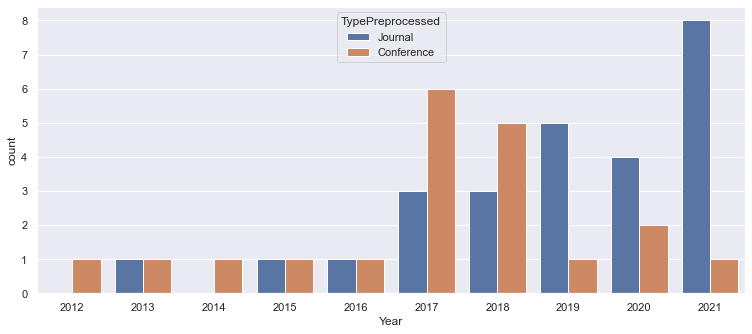

In [295]:
sns.set(rc={'figure.figsize':(12.7,5.27)})
sns.countplot(x= "Year",data=df,hue="TypePreprocessed")

## Annotation

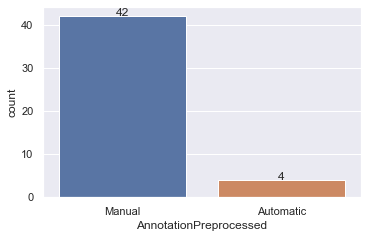

In [296]:
sns.set(rc={'figure.figsize':(5.7,3.5)})
df["Annotation"].fillna("Not specified",inplace=True)
df["AnnotationPreprocessed"] = df["Annotation"].apply(lambda x : "Manual" if "Manual" in x else "Automatic")
ax = sns.countplot(x= "AnnotationPreprocessed",data=df)
for p in ax.patches:
    percentage = '{}'.format(p.get_height())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x-0.4, y+0.1),ha='center')
plt.show()

## Data Sources

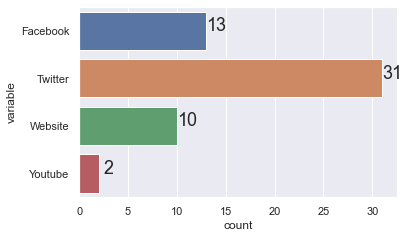

In [297]:
sources = df.copy()[['Title', 'Source']]
for modal in ['twitter', 'facebook', 'website', 'youtube']:
    sources[modal.title()] = sources['Source'].apply(lambda x: modal in x.lower())
    df[modal.title()] = sources[modal.title()]
    
    
sources = pd.melt(sources, id_vars=['Title', 'Source'])
sources = sources[sources['value'] == True]
ax = sns.countplot(data=sources, y='variable', order=['Facebook', 'Twitter', 'Website', 'Youtube'])
for p in ax.patches:
    percentage = '{}'.format(p.get_width())
    x = p.get_width()
    y = p.get_y() + (p.get_height()/2)
    ax.annotate(percentage, (x+ 1.01, y),ha='center', fontsize=18)
plt.show()

In [298]:
# sources = {"SourcePreprocessed":[]}
# for i in df["Source"]:
#     if "twitter" in i.lower():
#         sources["SourcePreprocessed"].append("Twitter")
#     if "facebook" in i.lower():
#         sources["SourcePreprocessed"].append("Facebook")
#     if "youtube" in i.lower():
#         sources["SourcePreprocessed"].append("YouTube")
#     if "websites" in i.lower():
#         sources["SourcePreprocessed"].append("WebSites")
#     else:
#         continue

# sources = pd.DataFrame(sources)
# sources
# sns.set(rc={'figure.figsize':(7.7,6.5)})
# ax = sns.countplot(y= "SourcePreprocessed",data=sources)
# ax.set_xticks(range(0, 45, 3))
# # ax2 = ax.twinx()
# # ax2.plot([0, 4], [10, 10], linewidth=2, color='k')
# # ax2.yaxis.set_ticks([])
# for p in ax.patches:
#     percentage = '{}'.format(p.get_width())
#     x = p.get_width()
#     y = p.get_y() + (p.get_height()/2)
#     ax.annotate(percentage, (x+ 1.01, y),ha='center', fontsize=18)
# plt.show()

## Feature extractor

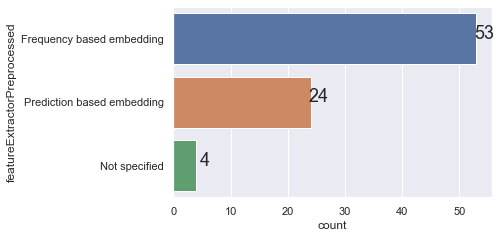

In [299]:
fE = {"Frequency based embedding":[],"Prediction based embedding":[],"Not specified":[]}
fElist = {"featureExtractorPreprocessed":[]}
feRe = []
w = ""
for fe in df["FeatureExtractor"]:
    fes = fe.split(" ")
    for f in fes:
        if ('Word' in f or "Fast" in f or "vec" in f or "Ara" in f or "GloVe" in f) and "LexiconFeatures" not in f:
            fE["Prediction based embedding"].append(f)
            fElist["featureExtractorPreprocessed"].append("Prediction based embedding")
            w = w+"PredictionBasedEmbedding "
        elif f=="None":
            fE["Not specified"].append(f)
            fElist["featureExtractorPreprocessed"].append("Not specified")
            w = "NotSpecified"
        else:
            fE["Frequency based embedding"].append(f)
            fElist["featureExtractorPreprocessed"].append("Frequency based embedding")
            w = w+ "FrequencyBasedEmbedding"
    feRe.append(w)
freBasedFea = fE["Frequency based embedding"]
preBasedFea = fE["Prediction based embedding"]
feExPre = pd.DataFrame(fElist)
ax = sns.countplot(y= "featureExtractorPreprocessed",data=feExPre)
sns.set(rc={'figure.figsize':(7,5)})
for p in ax.patches:
    percentage = '{}'.format(p.get_width())
    x = p.get_width()
    y = p.get_y() + (p.get_height()/2)
    ax.annotate(percentage, (x+ 1.41, y),ha='center', fontsize=18)
plt.show()

In [181]:
freBasedFea

['BOW',
 'TF-IDF',
 'LexiconFeatures(Negation+POS+Emoticons+Intensifiers)',
 'BOW',
 'N-gram',
 'LexiconFeatures(Acronyms+Emoticons+Interjections)',
 'BOW',
 'BOW',
 'BOW',
 'TF-IDF',
 'TF-IDF',
 'BOW',
 'N-gram',
 'N-gram',
 'LexiconFeatures(WordPositionFeature+Negations+Questions+Wishful)',
 'N-gram',
 'TF',
 'BOW',
 'N-gram',
 'LexiconFeatures',
 'LexiconFeatures',
 'LexiconFeatures',
 'N-gram',
 'N-gram',
 'N-gram',
 'TF-IDF',
 'TermOccurrence',
 'BinaryTermOccurrence',
 'TF-IDF',
 'BOW',
 'LexiconFeatures',
 'N-gram(CommonPhrasesSimilarity)',
 'N-gram',
 'LexiconFeatures(Negation+Wich)',
 'BOW',
 'TF-IDF',
 'N-gram',
 'TF-IDF',
 'BOW',
 'LexiconFeatures',
 'TF-IDF',
 'N-gram',
 'BOW',
 'LexiconFeatures',
 'LexiconFeatures(SentimentWords+SentimentTendency+SentimentPhrases+NegationWords+ReviewLength)',
 'N-gram',
 'TF-IDF',
 'TF-IDF',
 'TF',
 'TP(TermPresence)',
 'TF-IDF(N-gram)']

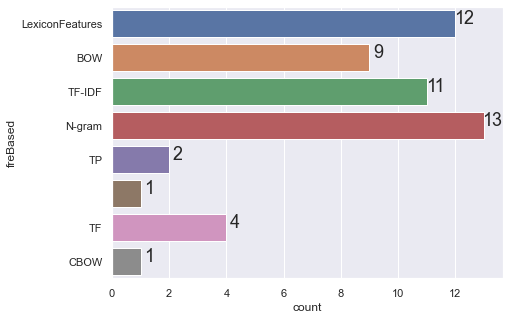

In [300]:
freBaDf = pd.DataFrame({"freBased":freBasedFea})
freBaDf["freBased"] = freBaDf["freBased"].apply(lambda x :"TP" if "TP" in x else x)
freBaDf["freBased"] = freBaDf["freBased"].apply(lambda x :"LexiconFeatures" if "LexiconFeatures" in x else x)
freBaDf["freBased"] = freBaDf["freBased"].apply(lambda x :"TF" if "Term" in x else x)
freBaDf["freBased"] = freBaDf["freBased"].apply(lambda x :"TF-IDF" if "TF-IDF" in x else x)
freBaDf["freBased"] = freBaDf["freBased"].apply(lambda x :"N-gram" if "N-gram" in x else x)

ax = sns.countplot(y= "freBased",data=freBaDf)
sns.set(rc={'figure.figsize':(7,6)})
for p in ax.patches:
    percentage = '{}'.format(p.get_width())
    x = p.get_width()
    y = p.get_y() + (p.get_height()/2)
    ax.annotate(percentage, (x+0.3, y),ha='center', fontsize=18)
plt.show()

## Transliteration study

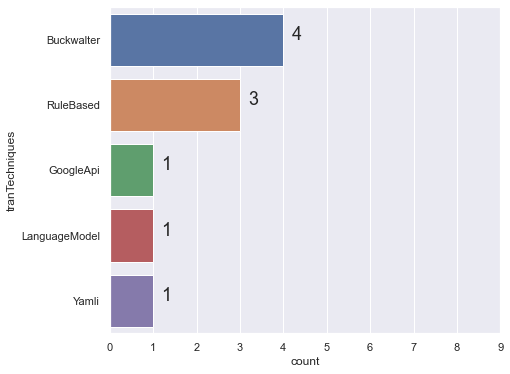

In [301]:
# Machine learning along with year
df.head(1)
tranTechniques = {"tranTechniques":[]}
for i,row in df.iterrows():
    tran = row["Transliteration"]
    if tran == 0:
        continue
    else:
        tran = str(tran)
        tran = tran.replace("1","").replace("(","").replace(")","")
        if "+" in tran:
            tranTechniques["tranTechniques"].extend(tran.split("+"))
            
        else:
            if "RuleBased" in tran:
                tranTechniques["tranTechniques"].append("RuleBased")
            elif tran!="":
                tranTechniques["tranTechniques"].append(tran)
            else:
                continue
ax = sns.countplot(y= "tranTechniques",data=pd.DataFrame(tranTechniques))
ax.set_xticks(range(10))
for p in ax.patches:
    percentage = '{}'.format(p.get_width())
    x = p.get_width()
    y = p.get_y() + (p.get_height()/2)
    ax.annotate(percentage, (x+0.3, y),ha='center', fontsize=18)
plt.show()

## Translation study

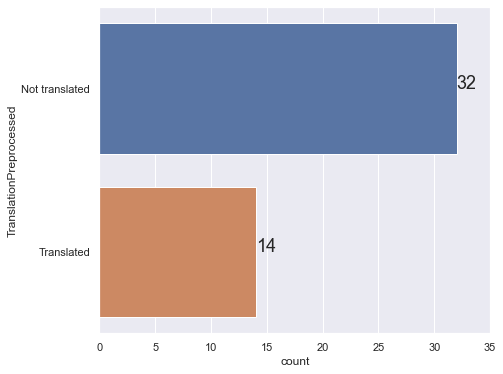

In [302]:
df["TranslationPreprocessed"] = df["Translation"].apply(lambda x:"Translated" if "1" in str(x) else "Not translated")
ax = sns.countplot(y= "TranslationPreprocessed",data=df)
ax.set_xticks(range(0,40,5))
for p in ax.patches:
    percentage = '{}'.format(p.get_width())
    x = p.get_width()
    y = p.get_y() + (p.get_height()/2)
    ax.annotate(percentage, (x+0.9, y),ha='center', fontsize=18)
plt.show()

## Preprocessing study

### Cleaning

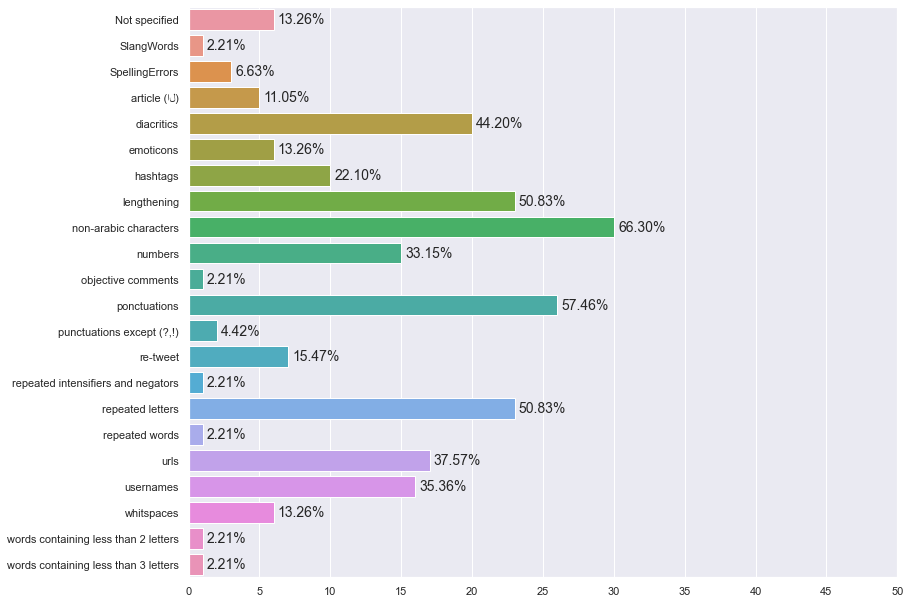

In [303]:
ser_cleaning = df["Cleaning"].apply(lambda x: re.split('\s|,', x))

te_cl = TransactionEncoder()
a_cl = te_cl.fit_transform(ser_cleaning.values)
usability_df_cleaning = pd.DataFrame(a_cl, columns=te_cl.columns_).astype(int)


rep_dict = {'DC': 'non-arabic characters',
 'DNA': 'non-arabic characters',
 'DE': 'emoticons',
 'DH': 'hashtags',
 'DN': 'numbers',
 'DP': 'ponctuations',
 'DPE': 'punctuations except (?,!)',
 'DU': 'urls',
 'DW': 'whitspaces',
 'NRL': 'repeated letters',
 'EU': 'usernames',
 'RDA': 'article (ال)', 
 'RRL': 'repeated letters',
 'RT': 're-tweet',
 'RW': 'whitspaces',
 'RE': 'emoticons',
 'SD': 'diacritics',
 'SL': 'lengthening',
 'RRW': 'repeated words',
 'RD': 'diacritics',  "RemoveWordsContaininglessThan3Letters":"words containing less than 3 letters",
            "RemoveWordsContaininglessThan2Letters":"words containing less than 2 letters",
             "RemovingRepeatedIntensifiersAndNegators":"repeated intensifiers and negators",
            "DeletingObjectiveMessages": "objective comments"
            }

usability_df_cleaning = usability_df_cleaning.rename(rep_dict, axis=1)


unspec_cols = ['None', '']
usability_df_cleaning['Not specified'] = usability_df_cleaning[unspec_cols].sum(axis=1)
usability_df_cleaning.drop(unspec_cols, axis=1, inplace=True)


usability_df_cleaning = usability_df_cleaning.T.reset_index().groupby('index').sum().T
udict = usability_df_cleaning.sum().to_dict()
s = 100/sum(udict.values())
sns.set(rc={'figure.figsize':(12.7,10.5)})
ax = sns.barplot(y=list(udict.keys()), x=list(udict.values()))
for p in ax.patches:
    percentage = '{:.2f}%'.format((p.get_width()/s))
    x = p.get_width()
    y = p.get_y() + (p.get_height()/2)
    ax.annotate(percentage, (x+0.3, y),ha='left', va='center', fontsize=14)

plt.xlim([0, 50])
plt.xticks(range(0, 55, 5))
plt.show()

### Normalization

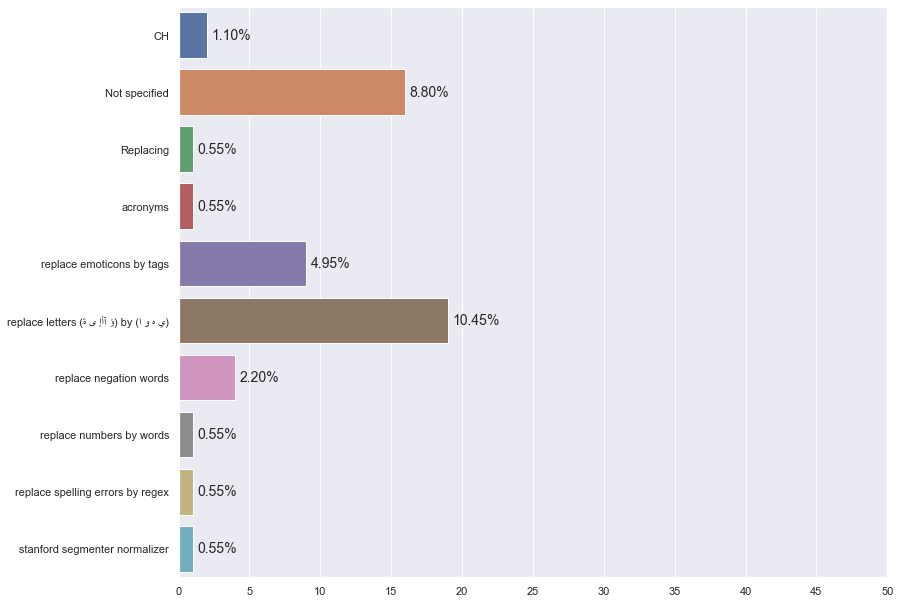

In [21]:
ser_normalization = df["Normalization"].apply(lambda x: re.split('\s|,', x))

te_cl = TransactionEncoder()
a_cl = te_cl.fit_transform(ser_normalization.values)
usability_df_normalization = pd.DataFrame(a_cl, columns=te_cl.columns_).astype(int)


rep_dict = {'CE': 'replace emoticons by tags',
 'RL': 'replace letters (ة ى إأآ ؤ) by (ا و ه ي)',
 'ReplacingNegationWords': 'replace negation words',
 'Replacing acronyms': 'replace acronyms',
 'ReplacingNumbersByWords ': 'replace numbers by words ',
 'StanfordSegmenterNormalization': 'stanford segmenter normalizer',
 'RegexForSpellingErrors': 'replace spelling errors by regex',
 'ReplacingNumbersByWords':'replace numbers by words'
            }

usability_df_normalization = usability_df_normalization.rename(rep_dict, axis=1)


unspec_cols = ['None']
usability_df_normalization['Not specified'] = usability_df_normalization[unspec_cols].sum(axis=1)
usability_df_normalization.drop(unspec_cols, axis=1, inplace=True)


usability_df_normalization = usability_df_normalization.T.reset_index().groupby('index').sum().T
udict = usability_df_normalization.sum().to_dict()
s = 100/sum(udict.values())
sns.set(rc={'figure.figsize':(12.7,10.5)})
ax = sns.barplot(y=list(udict.keys()), x=list(udict.values()))
for p in ax.patches:
    percentage = '{:.2f}%'.format((p.get_width()/s))
    x = p.get_width()
    y = p.get_y() + (p.get_height()/2)
    ax.annotate(percentage, (x+0.3, y),ha='left', va='center', fontsize=14)

plt.xlim([0, 50])
plt.xticks(range(0, 55, 5))
plt.show()

## Stop words study

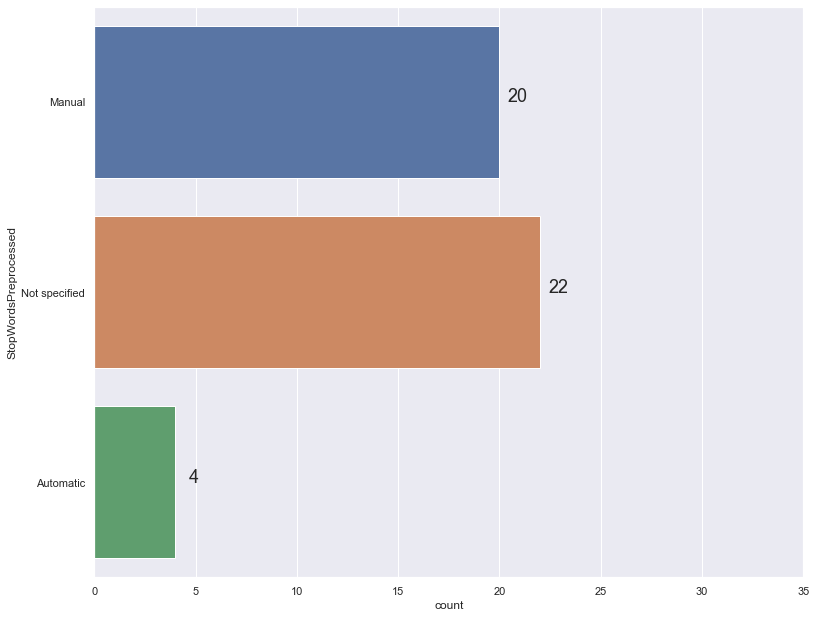

In [22]:
stPList = []
for i,row in df.iterrows():
    stWords = row["StopWords"]
    if "Manual" in stWords:
        stPList.append("Manual")
    elif "Automatic" in stWords:
        stPList.append("Automatic")
    else:
        stPList.append("Not specified")
df["StopWordsPreprocessed"] = stPList
ax = sns.countplot(y= "StopWordsPreprocessed",data=df)
ax.set_xticks(range(0,40,5))
for p in ax.patches:
    percentage = '{}'.format(p.get_width())
    x = p.get_width()
    y = p.get_y() + (p.get_height()/2)
    ax.annotate(percentage, (x+0.9, y),ha='center', fontsize=18)
plt.show()

## Stemming study

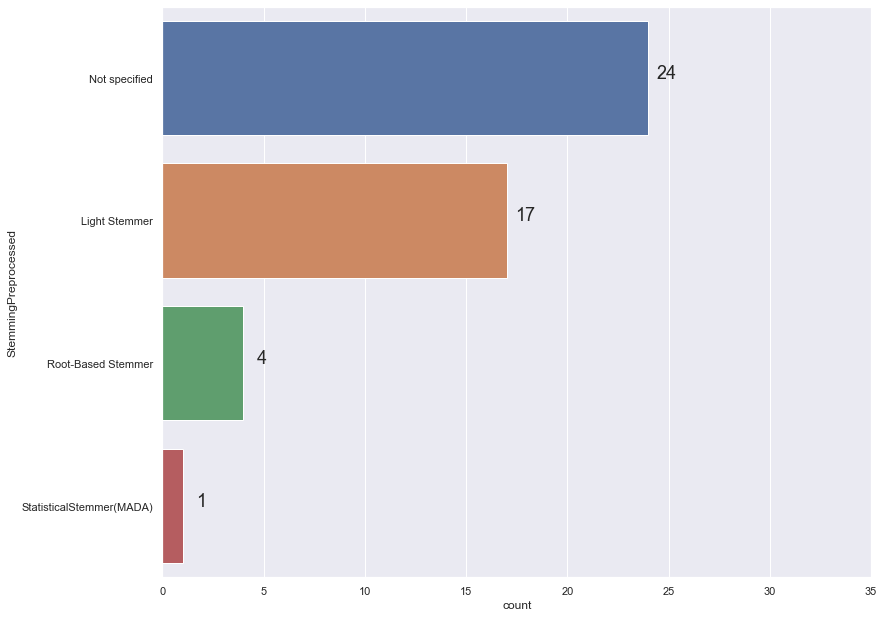

In [23]:
df["StemmingPreprocessed"] = df["Stemming"].apply(lambda x:"Light Stemmer" if "LightStemmer" in x else ("Root-Based Stemmer" if "RootBasedStemmer" in x else ("Not specified" if "None" in x else x)))
ax = sns.countplot(y= "StemmingPreprocessed",data=df)
ax.set_xticks(range(0,40,5))
for p in ax.patches:
    percentage = '{}'.format(p.get_width())
    x = p.get_width()
    y = p.get_y() + (p.get_height()/2)
    ax.annotate(percentage, (x+0.9, y),ha='center', fontsize=18)
plt.show()

## Negation handling

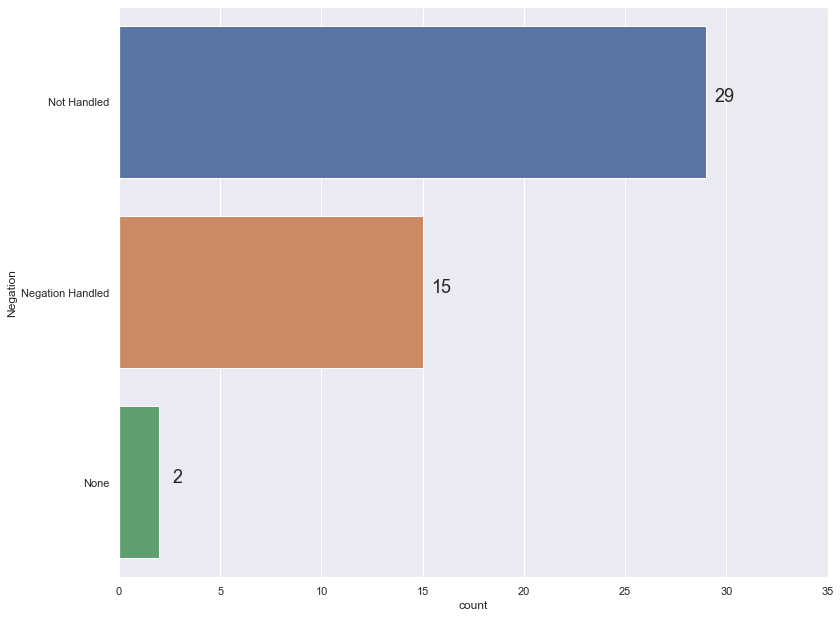

In [24]:
df["Negation"].replace(1,"Negation Handled",inplace=True)
df["Negation"].replace(0,"Not Handled",inplace=True)
ax = sns.countplot(y= "Negation",data=df)
ax.set_xticks(range(0,40,5))
for p in ax.patches:
    percentage = '{}'.format(p.get_width())
    x = p.get_width()
    y = p.get_y() + (p.get_height()/2)
    ax.annotate(percentage, (x+0.9, y),ha='center', fontsize=18)
plt.show()

## DataSet domain study

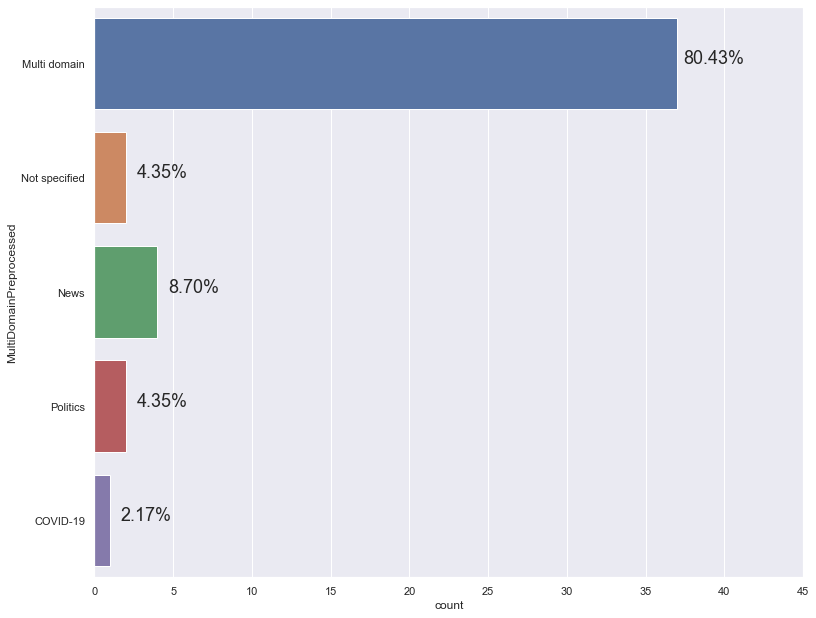

In [25]:
df["MultiDomainPreprocessed"] = df["MultiDomain"].apply(lambda x :"Multi domain" if x==1 else ("Not specified" if x=="None" else x)) 
ax = sns.countplot(y= "MultiDomainPreprocessed",data=df)
ax.set_xticks(range(0,50,5))
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*(p.get_width()/len(df["MultiDomainPreprocessed"])))
    x = p.get_width()
    y = p.get_y() + (p.get_height()/2)
    ax.annotate(percentage, (x+2.3, y),ha='center', fontsize=18)
plt.show()

In [26]:
df.head(1)

,DataBase,Title,Author,Year,Type,Dataset,Annotation,MultiDomain,Balanced,Source,...,TypePreprocessed,AnnotationPreprocessed,Twitter,Facebook,Website,Youtube,TranslationPreprocessed,StopWordsPreprocessed,StemmingPreprocessed,MultiDomainPreprocessed
0,Thesai,Semantic Sentiment Analysis of Arabic Texts,Sana Alowaidi,2017,Journal(IJACSA),826,Manual,1,1,Twitter,...,Journal,Manual,True,False,False,False,Not translated,Manual,Not specified,Multi domain


## Machine learning models

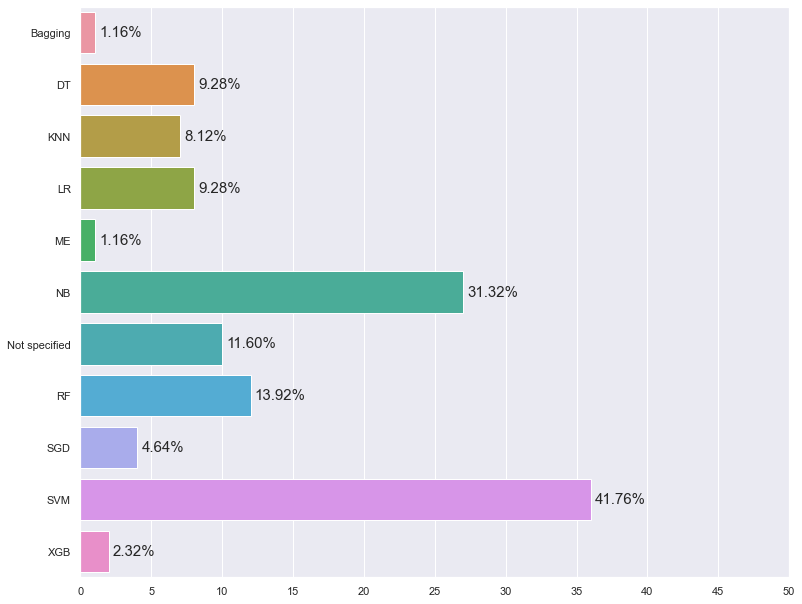

In [304]:
ser = df["MachineLearning"].apply(lambda x: re.sub("\"|\'", '', repr(x)))
ser = ser.apply(lambda x: re.split('\s|,', x))
te = TransactionEncoder()
a = te.fit_transform(ser.values)
usability_df = pd.DataFrame(a, columns=te.columns_).astype(int)
rep_dict = {'BNB': 'NB',
 'DNB': 'NB',
 'GNB': 'NB',
 'LSVC': 'SVM',
 'MNB': 'NB',
 'RD': 'RF',
 'SGDC': 'SGD',
 'SVC': 'SVM',
 'XgBoost': 'XGB'}

usability_df = usability_df.rename(rep_dict, axis=1)

unspec_cols = ['None', '0', '']
usability_df['Not specified'] = usability_df[unspec_cols].sum(axis=1)
usability_df.drop(unspec_cols, axis=1, inplace=True)


usability_df = usability_df.T.reset_index().groupby('index').sum().T
udict = usability_df.sum().to_dict()
s = 100/sum(udict.values())
ax = sns.barplot(y=list(udict.keys()), x=list(udict.values()))
for p in ax.patches:
    percentage = '{:.2f}%'.format((p.get_width()/s))
    x = p.get_width()
    y = p.get_y() + (p.get_height()/2)
    ax.annotate(percentage, (x+0.3, y),ha='left', va='center', fontsize=15)

plt.xlim([0, 50])
plt.xticks(range(0, 55, 5))
plt.show()

## Deep learning models

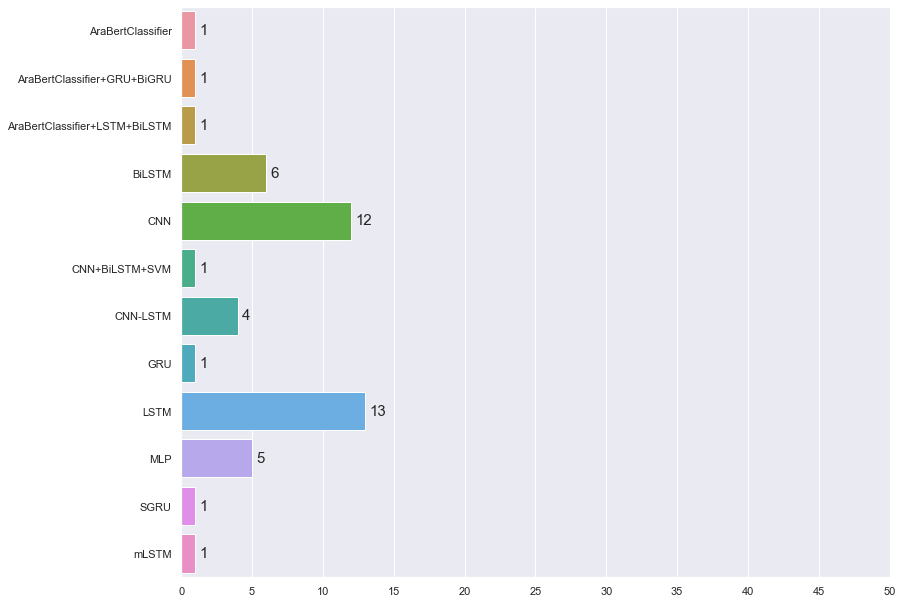

In [305]:
serDl = df["DeepLearning"].apply(lambda x: re.sub("\"|\'", '', repr(x)))
serDl = serDl.apply(lambda x: re.split('\s|,', x))
te = TransactionEncoder()
a = te.fit_transform(serDl.values)
usability_df_dl = pd.DataFrame(a, columns=te.columns_).astype(int)

usability_df_dl
usability_df_dl = usability_df_dl.rename(rep_dict, axis=1)

unspec_cols = ['0','']
#usability_df['Not specified'] = usability_df[unspec_cols].sum(axis=1)
usability_df_dl.drop(unspec_cols, axis=1, inplace=True)

usability_df_dl = usability_df_dl.T.reset_index().groupby('index').sum().T
udict = usability_df_dl.sum().to_dict()
s = 100/sum(udict.values())
ax = sns.barplot(y=list(udict.keys()), x=list(udict.values()))
for p in ax.patches:
    percentage = '{:00.0f}'.format((p.get_width()))
    x = p.get_width()
    y = p.get_y() + (p.get_height()/2)
    ax.annotate(percentage, (x+0.3, y),ha='left', va='center', fontsize=15)

plt.xlim([0, 50])
plt.xticks(range(0, 55, 5))
plt.show()

## Results

In [254]:
resPer = df["Results"].apply(lambda x: x.split("==")[-1])
res = df["Results"].apply(lambda x: re.split(r'\&{2,}', x))
resPer = resPer.apply(lambda x: x.split(" ")[-1] if len(x)>8 else x)
resPer = resPer.apply(lambda x:"Accuracy" if "Acc" in x else ("F1-score" if "F1" in x else x))
res = res.apply(lambda x: {i: re.split(r'\&+', y) for i, y in enumerate(x)})
res = res.apply(lambda x: {i: [tuple(pair.split("=")) for pair in y] for i, y in x.items()})
res = res.apply(lambda x: [{"exp_no": k, ki: list(vi)} for k, v in (x.items()) for ki, *vi in v])

data = []
for i, r in res.to_dict().items():
    expnos = sorted({x.get('exp_no', -1) for x in r})
    for e in expnos:
        ds = {"article_id": i, "article_name": i}
        for x in r:
            if x.get('exp_no') == e:
                dx = {k: v[0] if type(v).__name__ in ['list', 'set', 'tuple', 'dict'] and len(v) > 0 else v for k, v in x.items()}
                ds.update(dx)
        data.append(ds)
    
result_grid = pd.DataFrame(data)
metrics = pd.DataFrame({"Metric": resPer,"article_id":list(range(len(df)))})
result_grid["article_name"] = result_grid["article_name"].map(df['Title'].to_dict())
result_grid = result_grid.merge(metrics,how="inner")
# result_grid = pd.DataFrame(res) #.loc[0].values

In [256]:
melted_df = pd.melt(result_grid, id_vars=['article_id', 'article_name', 'exp_no', 'Metric']).dropna(subset=['value'])
experiments = melted_df['variable']
melted_df = melted_df.reset_index().drop('index', axis=1)

In [257]:
norm_dict = {"SVC": "SVM","LSVC":"SVM","GNB":"NB","BNB":"NB","SGDC":"SGD"}
xp_te = TransactionEncoder()
a = xp_te.fit_transform([[norm_dict.get(xp, xp) for xp in x.split('+') if len(xp) > 0 and xp!=""] for x in experiments])
exp_data = pd.DataFrame(a, columns=xp_te.columns_)

In [258]:
merged_df = pd.merge(melted_df.reset_index(), exp_data.reset_index())
merged_df = pd.merge(merged_df, sources, left_on='article_name', right_on="Title").drop(['index', 'value_y', 'Source', 'Title'], axis=1)
merged_df = merged_df.rename({'variable_y': 'Source', 'variable_x': 'Experiment', 'value_x': 'Metric value'}, axis=1)

In [259]:
merged_df["Experiments"] = merged_df["Experiment"].apply(lambda x: "SVM" if ("SVM" in x and "-" not in x) or "SVC" in x else x)
merged_df["Metric value_1"] = merged_df["Metric value"].apply(lambda x: re.sub("[A-Za-z]+|%|\+","",x) if type(x)!=list else "None")
values = []
for i in merged_df["Metric value_1"]:
    if i!="None":
        try:
            values.append(float(i))
        except:
            if i=="":
                values.append(np.nan)
            else:
                values.append(float(i[0:5]))
    else:
        values.append(np.nan)
merged_df["Metric value_1"] = values

In [260]:
label_Experiments = merged_df[["Sarcasm","Positive","Negative","Neutral","Metric value_1"]]
melted_label = pd.melt(label_Experiments, id_vars=['Metric value_1']).dropna(subset=['value'])
melted_label = melted_label[melted_label["value"]==True]

In [262]:
merged_df_fe = merged_df[["Experiment","Metric value_1"]]

In [279]:
# frequency_f = freBaDf["freBased"].unique()
# print(frequency_f)
f = []
m = []
for i, row in merged_df_fe.iterrows():
    col = row["Experiment"]
    metric = row["Metric value_1"]
# dictRename = {}
    if "TF-IDF" in col :
        f.append("TF-IDF")
    elif "BOW" in col and "CBOW" not in col:
        f.append("BOW")
    elif "TP" in col:
        f.append("TP")
    elif "TF" in col and "TF-IDF" not in col :
        f.append("TF")
    elif "TF-IDF(N-gram)" == col:
        f.append("TF-IDF")
    elif "N-gram(" in col:
        f.append("N-gram")
    elif "N-gram" == col:
        f.append("N-gram")
    elif "LexiconFeatures" in col:
        f.append("LexiconFeatures")
    elif "N-gram" in col:
        f.append("N-gram")
    else :
        continue
    m.append(metric)
fre_df = pd.DataFrame({"frequency_features":f,"Metric value_1":m})
# merged_df_f_f = merged_df.rename(dictRename,axis=1)
# melted_f_f = pd.melt(merged_df_f_f, id_vars=['Metric value_1']).dropna(subset=['value'])
# merged_df_f_f[merged_df_f_f[list(frequency_f)]]


In [335]:
type(merged_df_approaches["Translation_y"].unique()[5])

int

In [345]:
merged_df_approaches = pd.merge(merged_df, df, left_on='article_name', right_on="Title")
merged_df_approaches["Approach"] = merged_df_approaches["Approach"].apply(lambda x:"Hybrid" if "Hybrid" in x else("Machine learning" if "ML" in x else "Lexion based"))
merged_df_approaches["Negation"] = merged_df_approaches["Negation"].apply(lambda x: "Yes" if x==1 else "No")
merged_df_approaches["Translation_y_t"] = merged_df_approaches["Translation_y"].apply(lambda x: "Yes" if type(x)==str and "1" in x else ("Yes" if type(x)==int and x==1 else ("No" if type(x)==str and "0" in x else "No")))

In [354]:
list(merged_df_approaches.columns)

['article_id',
 'article_name',
 'exp_no',
 'Metric',
 'Experiment',
 'Metric value',
 '1200(Egyptian)',
 '1200(Emirati)',
 '2-way',
 '2400',
 '3-way',
 '4-way',
 'ALG_Senti',
 'ARTwitter',
 'ASTD',
 'ASTD-ArTwitter-QRCI',
 'ASTD/QCRI/ARTwitter',
 'ATSAD',
 'AfterExpansion',
 'AfterPreprocessing',
 'ArTwitter',
 'AraBert',
 'AraBertClassifier',
 'AraBertClassifier-GRU-BiGRU',
 'AraBertClassifier-LSTM-BiLSTM',
 'AraVec',
 'AraVec(CBOW)',
 'BOW',
 'BaggingRF',
 'BaggingSVM',
 'Balanced(6630)',
 'BeforeExpansion',
 'BeforePreprocessing',
 'Bi',
 'Bi)',
 'BiGRU',
 'BiLSTM',
 'BinaryTermOccurrence',
 'CBOW',
 'CNN',
 'CNN-BiLSTM-SVM',
 'CNN-LSTM',
 'DT',
 'DataSet1',
 'DataSet2',
 'DataSet3',
 'Doc2vec',
 'Egyptian',
 'ElecMorroco',
 'Facebook',
 'Farasa',
 'FastText',
 'GRU',
 'GloVe',
 'Gulf',
 'ISRI',
 'KNN',
 'LABR',
 'LABR(MultiDialects)',
 'LR',
 'LSTM',
 'Levantine',
 'LexiconFeatures',
 'LexiconFeatures(ConceptIncorporation)',
 'LexiconFeatures(NegationRules)',
 'LexiconFeatures(Sar

In [359]:
tr = []
met = []

for i, row in merged_df_approaches.iterrows():
    if row["Without Translation"] == True or row["WithoutTranslation"] == True:
        tr.append("No")
    elif "1" in str(row["Translation_y"]):
        tr.append("Yes")
    elif "0" in str(row["Translation_y"]):
        tr.append("No")
    else:
        continue
    met.append(row["Metric value_1"])
Translation_df = pd.DataFrame({"Translation":tr,"Metric value_1":met})

(0.0, 105.0)

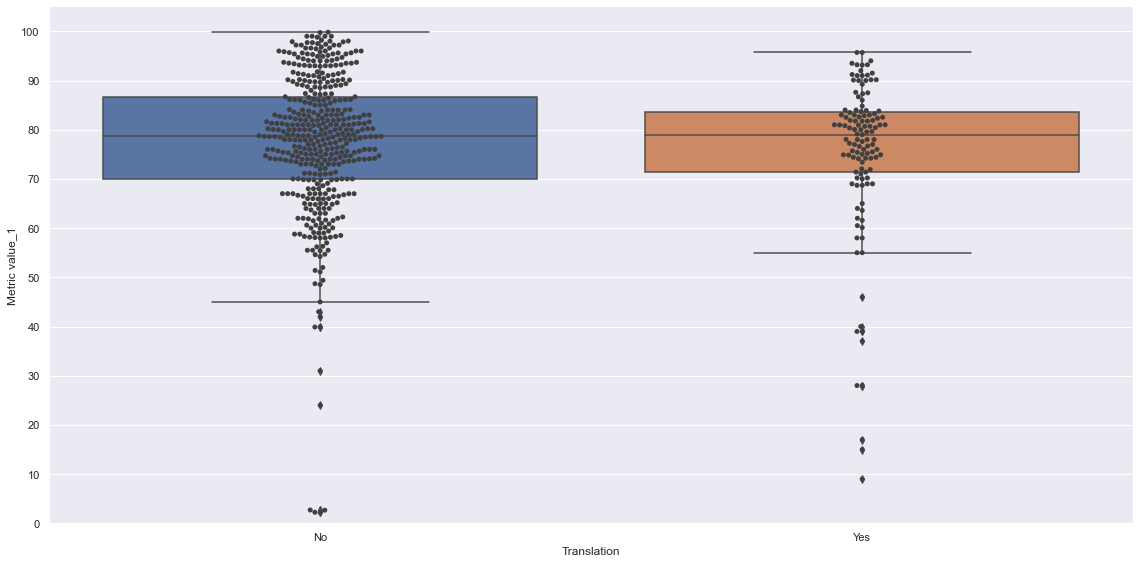

In [360]:
sns.set(rc={'figure.figsize':(15,14)})
sns.catplot(x="Translation", y="Metric value_1",
            kind="box", dodge=False, data=Translation_df,aspect = 2,height = 8)
ax = sns.swarmplot(x="Translation", y="Metric value_1", data=Translation_df, color=".25")
ax.set_yticks(range(0, 105, 10))
#WithoutNeutral
plt.ylim(0,105)

## Negation with results study

(0.0, 105.0)

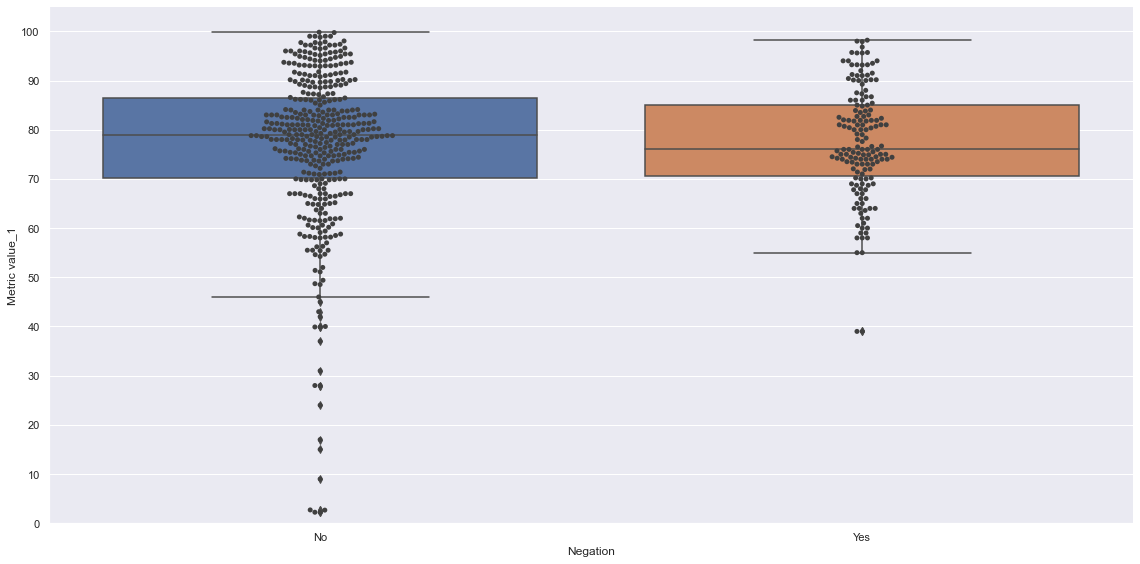

In [320]:
sns.set(rc={'figure.figsize':(15,14)})
sns.catplot(x="Negation", y="Metric value_1",
            kind="box", dodge=False, data=merged_df_approaches,aspect = 2,height = 8)
ax = sns.swarmplot(x="Negation", y="Metric value_1", data=merged_df_approaches, color=".25")
ax.set_yticks(range(0, 105, 10))
#WithoutNeutral
plt.ylim(0,105)

## Translation with results study

## Sentiment analysis approaches with results study

(0.0, 105.0)

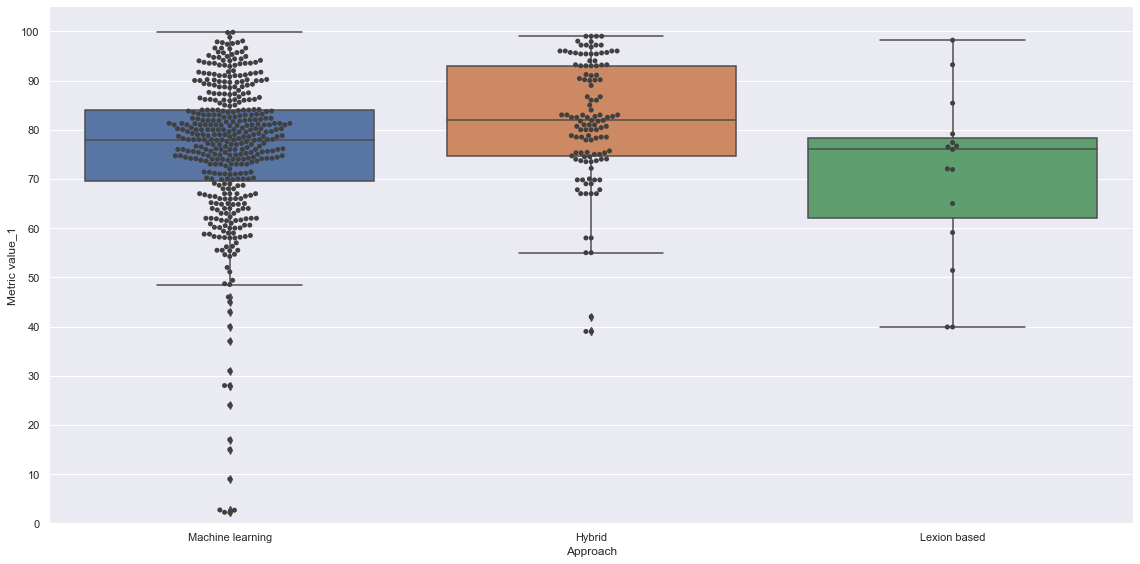

In [313]:
sns.set(rc={'figure.figsize':(15,14)})
sns.catplot(x="Approach", y="Metric value_1",
            kind="box", dodge=False, data=merged_df_approaches,aspect = 2,height = 8)
ax = sns.swarmplot(x="Approach", y="Metric value_1", data=merged_df_approaches, color=".25")
ax.set_yticks(range(0, 105, 10))
#WithoutNeutral
plt.ylim(0,105)

## Frequency based with results study

(0.0, 105.0)

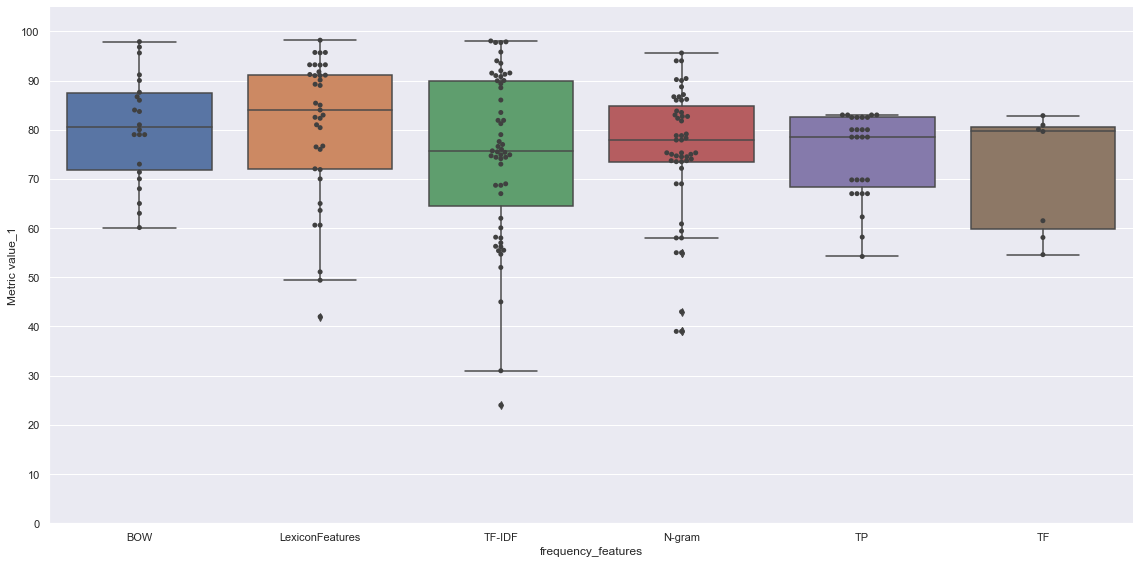

In [280]:
sns.set(rc={'figure.figsize':(15,14)})
sns.catplot(x="frequency_features", y="Metric value_1",
            kind="box", dodge=False, data=fre_df,aspect = 2,height = 8)
ax = sns.swarmplot(x="frequency_features", y="Metric value_1", data=fre_df, color=".25")
ax.set_yticks(range(0, 105, 10))
#WithoutNeutral
plt.ylim(0,105)

(0.0, 100.0)

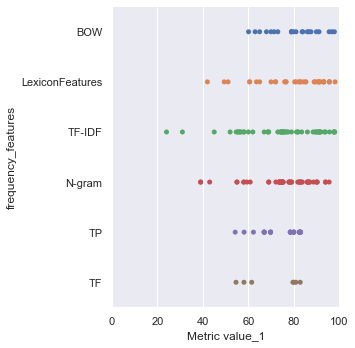

In [282]:
sns.catplot(x="Metric value_1", y="frequency_features", data=fre_df, jitter=False)
plt.xlim(0,100)

In [286]:
fr = []
mr = []
for i, row in merged_df_fe.iterrows():
    col = row["Experiment"]
    metric = row["Metric value_1"]
# dictRename = {}
    if "Word2vec" in col :
        fr.append("Word2vec")
    elif "FastText" in col:
        fr.append("FastText")
    elif "Doc2vec" in col:
        fr.append("Doc2vec")
    elif "AraVec" in col:
        fr.append("AraVec")
    elif "AraBert" in col:
        fr.append("AraBert")
    elif "GloVe" in col:
        fr.append("GloVe")
    elif "CBOW" in col:
        fr.append("CBOW")
    else:
        continue
    mr.append(metric)
Pre_df = pd.DataFrame({"Prediction_features":fr,"Metric value_1":mr})

## Prediction based with results study

(0.0, 105.0)

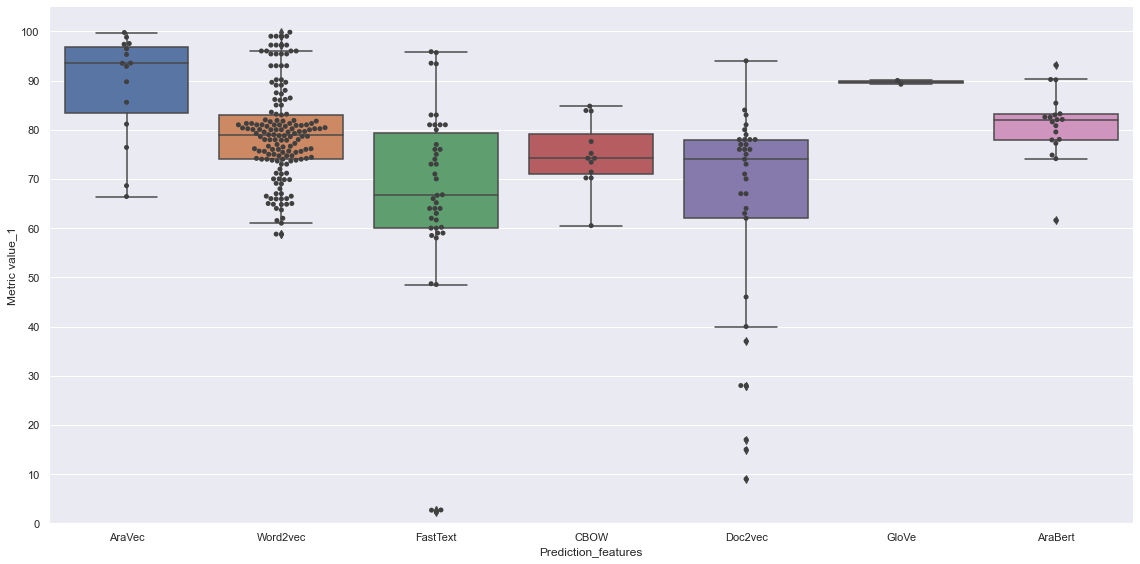

In [287]:
sns.set(rc={'figure.figsize':(15,14)})
sns.catplot(x="Prediction_features", y="Metric value_1",
            kind="box", dodge=False, data=Pre_df,aspect = 2,height = 8)
ax = sns.swarmplot(x="Prediction_features", y="Metric value_1", data=Pre_df, color=".25")
ax.set_yticks(range(0, 105, 10))
#WithoutNeutral
plt.ylim(0,105)

(0.0, 100.0)

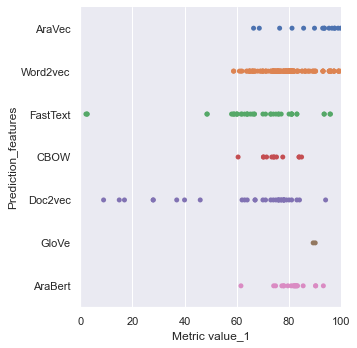

In [288]:
sns.catplot(x="Metric value_1", y="Prediction_features", data=Pre_df, jitter=False)
plt.xlim(0,100)

## Classes performance

(0.0, 105.0)

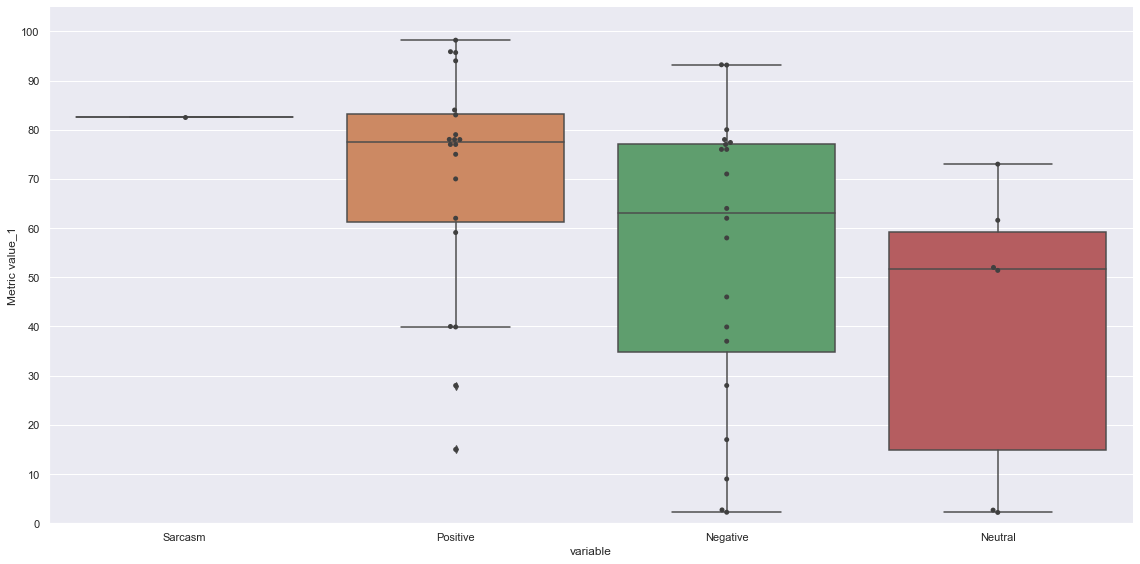

In [165]:
sns.set(rc={'figure.figsize':(15,14)})
sns.catplot(x="variable", y="Metric value_1",
            kind="box", dodge=False, data=melted_label,aspect = 2,height = 8)
ax = sns.swarmplot(x="variable", y="Metric value_1", data=melted_label, color=".25")
ax.set_yticks(range(0, 105, 10))
#WithoutNeutral
plt.ylim(0,105)

In [125]:
Svm_Experiments = merged_df[["Experiments","Metric value_1","Source","article_name"]]
df["featureExtractorResult"] = feRe
df_2 = df.drop("Source",axis=1)
df_all = pd.merge(Svm_Experiments,df_2,left_on='article_name', right_on="Title")

In [126]:
# df_all[["Experiment_SVM","Metric value_1"]]
df_all_2 = df_all.copy()
df_algo = df_all_2[["Metric value_1","Experiments"]]
algos = list(usability_df.columns)
algos.remove("Not specified")
algos.append("PolarityScoring")
algos.append("XgBoost")

In [127]:
algList = {}
for algoE in df_algo["Experiments"].values:
    for algo in algos:
        if algo in algoE:
            algList[algoE] = algo
df_algo["Experiments_ml"] = df_algo["Experiments"].replace(algList,inplace=False)
algo_ML = df_algo.query('Experiments_ml in @algos')

C:\Users\uchiha\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
algo_ML

,Metric value_1,Experiments,Experiments_ml
0,85.99,NB+BOW,NB
1,91.15,SVM,SVM
2,91.77,NB+WE,NB
3,95.63,SVM,SVM
4,74.68,SVM,SVM
...,...,...,...
544,54.69,TF-IDF+SVM,SVM
545,58.17,3-way+SVM+TP,SVM
546,58.09,SVM,SVM
547,58.15,SVM+TF-IDF,SVM


In [129]:
algo_Dl = ['BiGRU','BiLSTM','CNN','GRU','LSTM','MLP','SGRU','mLSTM']
algo_Dl_2 = ['LSTM-BiLSTM','CNN-BiLSTM-SVM','CNN-LSTM']

algListDl = {}
for algoEDl in df_algo["Experiments"].values:
    c=0
    for algoDl2 in algo_Dl_2:
        if algoDl2 in algoEDl:
            algListDl[algoEDl] = algoDl2
            c=1
    if c==0:
        for algoDl1 in algo_Dl:
            if algoDl1 in algoEDl:
                algListDl[algoEDl] = algoDl1
    else:
        continue
df_algo["Experiments_dl"] = df_algo["Experiments"].replace(algListDl,inplace=False)
algo_Dl.extend(algo_Dl_2)

algo_DL = df_algo.query('Experiments_dl in @algo_Dl')


C:\Users\uchiha\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Deep learning models with results

(0.0, 105.0)

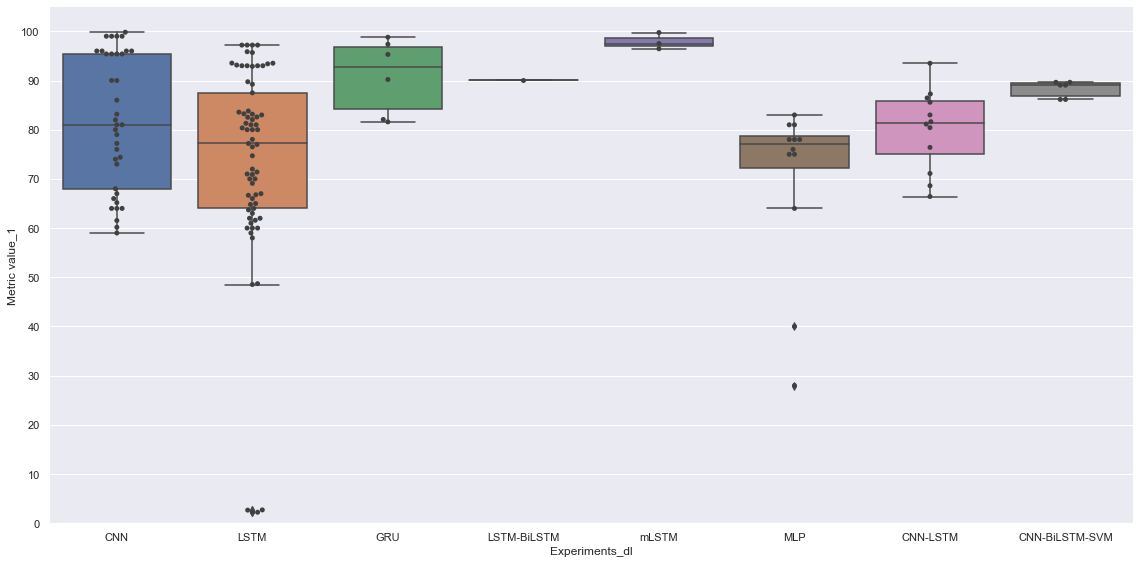

In [130]:
sns.set(rc={'figure.figsize':(15,14)})
sns.catplot(x="Experiments_dl", y="Metric value_1",
            kind="box", dodge=False, data=algo_DL,aspect = 2,height = 8)
ax = sns.swarmplot(x="Experiments_dl", y="Metric value_1", data=algo_DL, color=".25")
ax.set_yticks(range(0, 105, 10))

plt.ylim(0,105)

## The mean performance of deep learning models

<AxesSubplot:xlabel='Metric value_1', ylabel='Experiments_dl'>

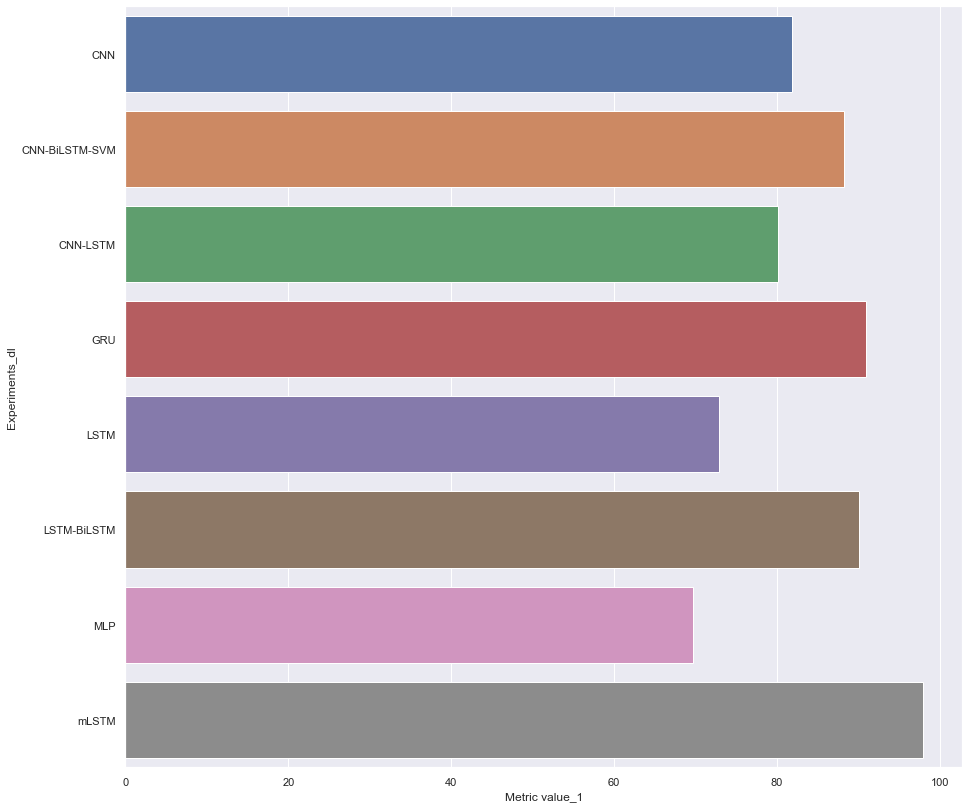

In [131]:
# sns.countplot(x="Experiments_dl",data =algo_DL )
sns.barplot(data = algo_DL.groupby("Experiments_dl").mean().reset_index(), x= "Metric value_1", y="Experiments_dl")

## Machine learning models with results

(0.0, 100.0)

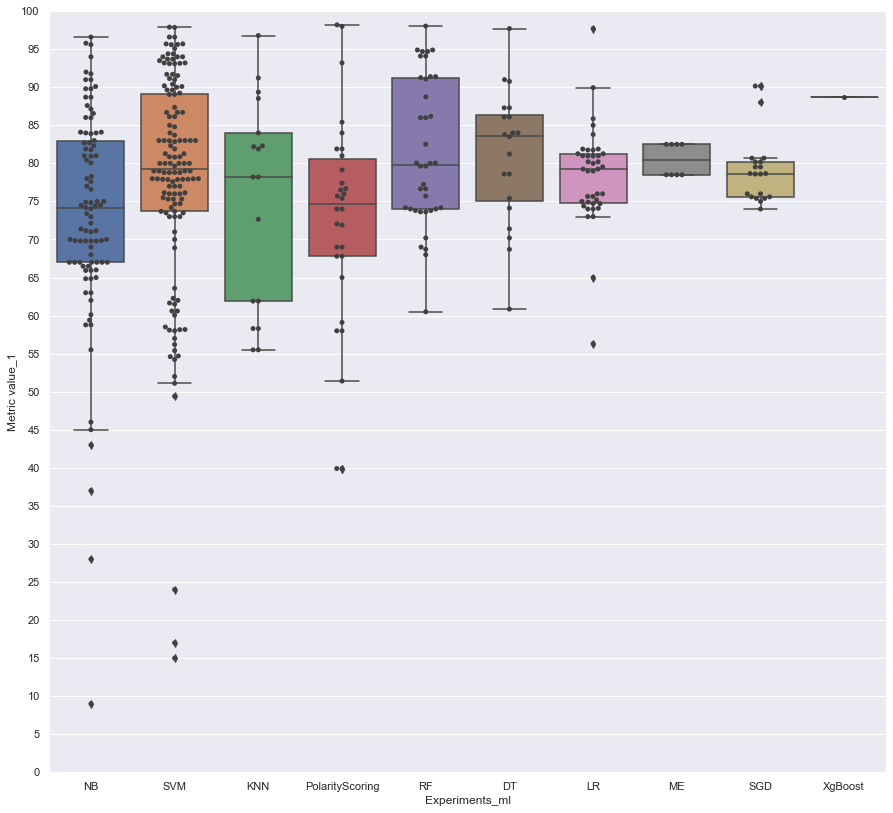

In [132]:
sns.set(rc={'figure.figsize':(15,14)})
ax = sns.boxplot(x="Experiments_ml", y="Metric value_1", data=algo_ML)
ax = sns.swarmplot(x="Experiments_ml", y="Metric value_1", data=algo_ML, color=".25")
ax.set_yticks(range(0, 105, 5))
plt.ylim(0,100)

## Machine learning vs Deep learning model with results

In [134]:
algo_Dl = ['BiGRU','BiLSTM','CNN','GRU','LSTM','MLP','SGRU','mLSTM',"AraBertClassifier"]
algo_Dl_2 = ['LSTM-BiLSTM','CNN-BiLSTM-SVM','CNN-LSTM']
algListMlDl = {}
for algoE in df_all_2["Experiments"].values:
    for algo in algos:
        if algo in algoE:
            algListMlDl[algoE] = "Machine learning"
            
for algoEDl in df_all_2["Experiments"].values:
    c=0
    for algoDl2 in algo_Dl_2:
        if algoDl2 in algoEDl:
            algListMlDl[algoEDl] = "Deep learning"
            c=1
    if c==0:
        for algoDl1 in algo_Dl:
            if algoDl1 in algoEDl:
                algListMlDl[algoEDl] = "Deep learning"
    else:
        continue
df_algo["Experiments_ml_vs_dl"] = df_all_2["Experiments"].replace(algListMlDl,inplace=False)


C:\Users\uchiha\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [135]:
df_algo_n = df_algo.replace("",np.nan).dropna()

(0.0, 105.0)

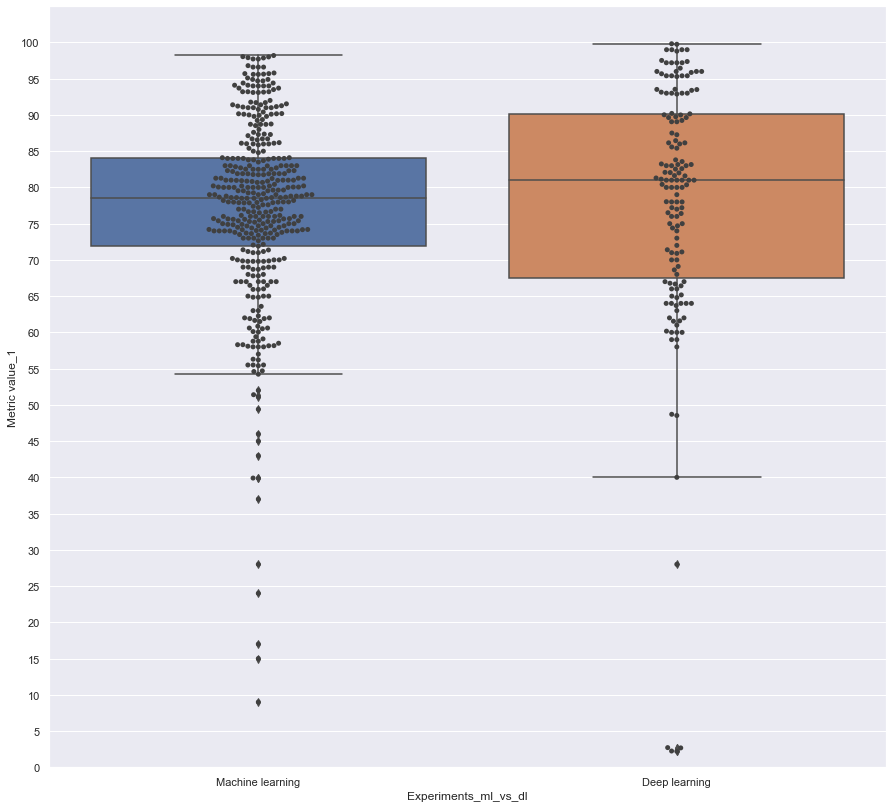

In [136]:
sns.set(rc={'figure.figsize':(15,14)})
ax = sns.boxplot(x="Experiments_ml_vs_dl", y="Metric value_1", data=df_algo_n)
ax = sns.swarmplot(x="Experiments_ml_vs_dl", y="Metric value_1", data=df_algo_n, color=".25")
ax.set_yticks(range(0, 105, 5))
plt.ylim(0,105)

(0.0, 100.0)

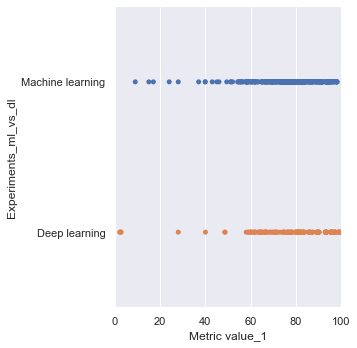

In [137]:
sns.catplot(x="Metric value_1", y="Experiments_ml_vs_dl", data=df_algo_n, jitter=False)
plt.xlim(0,100)

In [149]:
#sns.kdeplot(data=df_algo_n,x="Metric value_1", hue="Experiments_ml_vs_dl")


(0.0, 100.0)

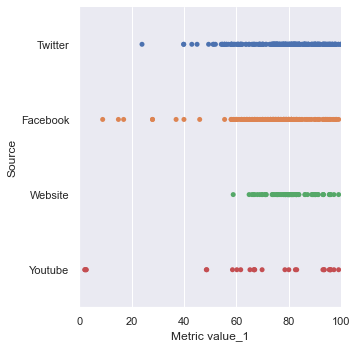

In [140]:
sns.catplot(x="Metric value_1", y="Source", data=Svm_Experiments, jitter=False)
plt.xlim(0,100)

C:\Users\uchiha\Anaconda3\envs\nlp\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\uchiha\Anaconda3\envs\nlp\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(0.0, 100.0)

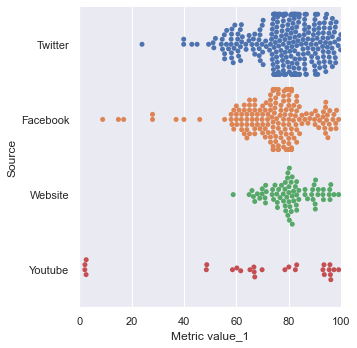

In [146]:
sns.catplot(x="Metric value_1", y="Source", data=df_all,kind="swarm")
plt.xlim(0,100)

(0.0, 100.0)

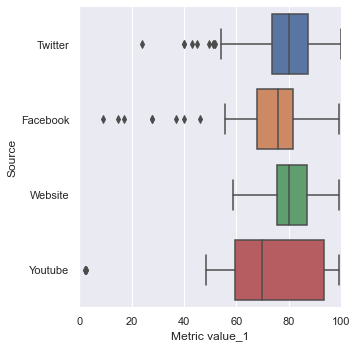

In [147]:
sns.catplot(x="Metric value_1", y="Source", kind="box", data=df_all)
plt.xlim(0,100)

C:\Users\uchiha\Anaconda3\envs\nlp\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(0.0, 100.0)

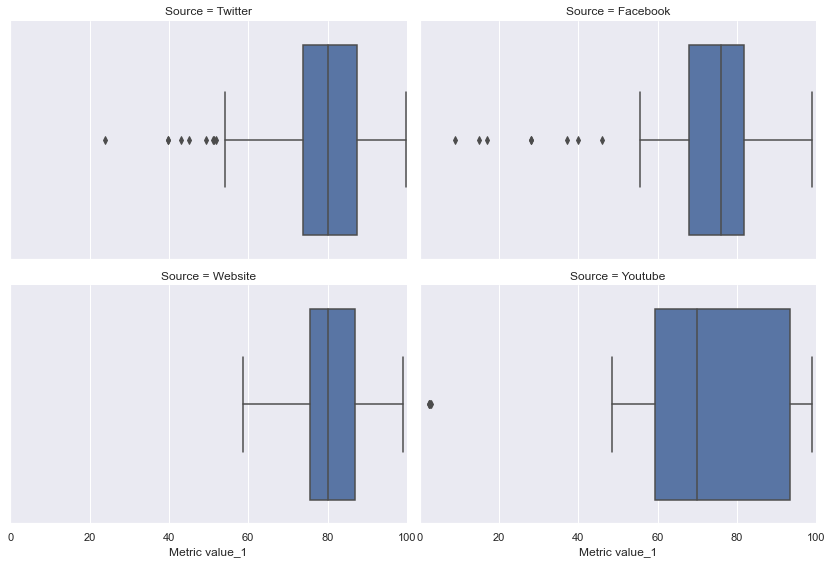

In [148]:
g = sns.FacetGrid(data=Svm_Experiments, col="Source", col_wrap=2, aspect=13/9, height=4)
g.map(sns.boxplot,'Metric value_1')
plt.xlim(0,100)

In [53]:
article44 = result_grid.loc[result_grid['article_id'] == 42]
# article44.dropna(how='all', axis=1).T

In [150]:
# s=0
# for i in list(result_grid.columns):
#     if "sv" in i.lower():
#         print(i)
#         s+=1
# s


In [55]:
# repl_dict = {}
# for algo in algos:
#     repl_dict[re.compile(f"(.*){re.escape(algo)}")] = algo

# df_algo['Experiments'].replace(repl_dict, regex=True)
# x = "SVM"
# line = "sk+SVM+we"
# pa = re.compile(f"(.*){x}")
# print(pa)
# o = pa.sub("", line)
# line.replace(o,"")
# re.sub(f'(.*){x}', r'\1', line)
algos

['Bagging',
 'DT',
 'KNN',
 'LR',
 'ME',
 'NB',
 'RF',
 'SGD',
 'SVM',
 'XGB',
 'PolarityScoring',
 'XgBoost']